## Embedding
+ 워드 임베딩은 컴퓨터가 단어를 이해하고 효율적으로 처리할 수 있도록 단어를 벡터화하는 방법
+ 단어의 의미를 잘 표현해야하며, 현재까지도 많은 표현 방법들이 연구되는 중
+ 워드 임베딩을 거쳐 잘 표현된 단어벡터들은 계산이 가능하며, 모델 투입도 가능

### Encoding
+ 자연어를 컴퓨터가 이해할 수 있도록 숫자 등으로 변환하는 작업
+ 텍스트 처리에서는 주로 정수인코딩, 원핫인코딩 사용

In [1]:
#dictionary를 이용한 정수인코딩
text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'
tokens = [x for x in text.split(' ')]
unique = list(set(tokens))

token2index = {}
for i in range(len(unique)):
    token2index[unique[i]] = i
    
encode = [token2index[x] for x in tokens]
encode

[1, 9, 4, 3, 2, 7, 8, 6, 4, 0, 5]

In [2]:
#keras를 이용한 정수인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


In [3]:
#조건문, 반복문을 이용한 원핫인코딩
import numpy as np

one_hot = []
for i in range(len(encoded)):
    temp = []
    for j in range(max(encoded)):
        if j == (encoded[i]-1):
            temp.append(1)
        else:
            temp.append(0)
    one_hot.append(temp)
    
np.array(one_hot)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [4]:
#keras를 이용한 원핫인코딩
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### IMDB 데이터 사용해보기
+ Internet Movie DataBase
+ 긍정(1)/부정(0) 리뷰 5만개로 이루어진 데이터셋(훈련데이터 2.5만, 검증데이터 2.5만)

In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

num_words = 1000   #등장빈도 순위 1000위까지의 단어만 사용(즉, 단어 집합의 크기가 1000)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((25000,), (25000,), (25000,), (25000,))

In [6]:
for i in range(3):
    if y_train[i] == 0:
        print('부정 =>', x_train[i])
    else:
        print('긍정 =>', x_train[i])

긍정 => [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
부정 => [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 

### 데이터 전처리
+ `pad_sequence()` : 모든 데이터를 같은 길이로 맞추기
    + maxlen 보다 길면 데이터를 자름
    + maxlen 보다 짧으면 부족한만큼 padding으로 채워넣음
        + `pre` : 데이터 앞을 채움
        + `post` : 데이터 뒤를 채움 
+ 모든 데이터가 같은 길이로 맞춰져야 `Embedding ` 레이어 사용 가능

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100
padded_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
padded_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

print(len(x_train[0]), '=>', len(padded_x_train[0]))
print(len(x_test[0]), '=>', len(padded_x_test[0]))

218 => 100
68 => 100


In [8]:
#모델 구성
model = Sequential([Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
                    Flatten(),
                    Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           32000     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3201      
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
#컴파일, 학습
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(padded_x_train, y_train,
                    epochs=10, verbose=0,
                    batch_size=32,
                    validation_split=0.2)

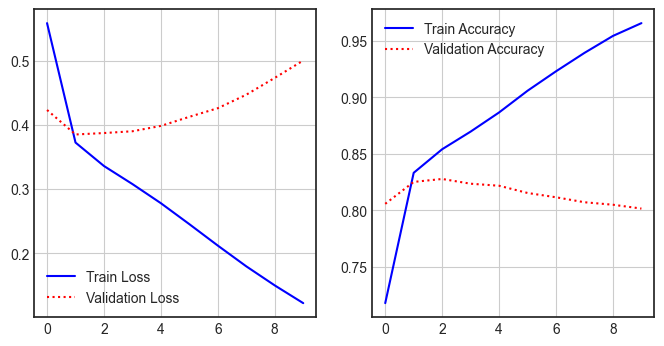

In [10]:
#시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='Train Loss')
plt.plot(history.history['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid();

In [11]:
#평가
model.evaluate(padded_x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.48739573680877685, 0.80532]

+ num_words 값을 키우면 모델 성능이 조금 더 향상될 것
+ 그러나 과적합 문제는 피할 수 없는데, 그 이유는
    + 단어간 관계나 문장구조 등 의미적 연결을 고려하지 않음  
    => 시퀀스 전체를 고려한 특성을 학습하기 위해 `Embedding`층 위해 `RNN`층이나 `1D 합성곱` 추가 가능  
    => 8, 9번 문서로 가시오

### Word2Vec
+ 분류 등과 같이 별도의 레이블 없이 텍스트 자체만으로도 학습 가능
+ 주변 단어와의 관계를 이용하는 방법
1. CBOW(continuous bag of words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측
2. Skip-gram
    - 대상단어의 임베딩으로 주변단어를 예측
    + 일반적으로 CBOW보다 성능이 좋은 편이나, 한번에 여러 단어를 예측하기 때문에 비효율적
    + 최근에는 negative sampling이라는 방법 사용

### TSNE(t-stochastic neighbor embedding)
+ 고차원 벡터들의 구조를 보존하며 저차원으로 사상하는 차원축소 알고리즘
+ 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 많이 사용됨

In [12]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(shuffle=True, random_state=2,
                          remove=('headers', 'footers', 'quotes'))
docs = data.data

print(len(docs))
docs[0]

11314


"Something about how Koresh had threatened to cause local \nproblems with all these wepaons he had and was alleged to\nhave.  \n\nSomeone else will post more details soon, I'm sure.\n\nOther News:\nSniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect\nwas disgruntled employee of Universal Studios, which\nis a division of M.C.A.\n\n\nQUESTION:\nWhat will Californians do with all those guns after the Reginald\ndenny trial?"

In [13]:
#전처리
import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt')

def clean_text(d):     #알파벳과 공백문자가 아닌 텍스트 삭제
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    result = ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w)>3])
    return result

def tokenize(d):   #빈칸 기준으로 단어를 나누는 토큰화
    return word_tokenize(d)

In [14]:
import pandas as pd

news_df = pd.DataFrame({'article':docs})
print(len(news_df))

news_df.replace('', float('NaN'), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))
print(news_df.head(2))

news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
print(news_df.head(2))

11314
11096
                                             article
0  Something about how Koresh had threatened to c...
1  I have an Okidata 2410 printer for which I wou...
                                             article
0  something koresh threatened cause local proble...
1  okidata printer would like printer driver anyo...


In [15]:
tokenized_df = news_df['article'].apply(tokenize)
tokenized_list = tokenized_df.to_list()

len(tokenized_list[0])

31

In [16]:
tokenized_df = news_df['article'].apply(tokenize)
tokenized_list = tokenized_df.to_list()

len(tokenized_list[0])

31

In [17]:
import numpy as np

drop_news = [i for i, sentence in enumerate(tokenized_list) if len(sentence)<=1]
news_text = np.delete(tokenized_list, drop_news, axis=0)

print(len(news_text))

10939


c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### Gensim을 이용한 Word2Vec
#### 1. CBOW

In [18]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=news_text, 
                 window=3,     #Maximum distance between the current and predicted word within a sentence
                 size=100,     #Dimensionality of the word vectors
                 min_count=5,  #Ignores all words with total frequency lower than this
                 workers=4,    #Use these many worker threads to train the model (=faster training with multicore machines).
                 sg=0)         #1 for skip-gram; otherwise CBOW.

In [19]:
model.wv.most_similar(positive=['soldiers'])

[('turkey', 0.9957754611968994),
 ('turks', 0.9918668270111084),
 ('genocide', 0.9864974021911621),
 ('muslim', 0.9809432029724121),
 ('henrik', 0.9789729118347168),
 ('arab', 0.974604070186615),
 ('murdered', 0.9734508395195007),
 ('azerbaijani', 0.9724173545837402),
 ('armenians', 0.9699314832687378),
 ('town', 0.9694576263427734)]

#### 2. Skip-gram

In [20]:
model = Word2Vec(sentences=news_text, 
                 window=3, size=100,    
                 min_count=5, workers=4, sg=1)    #1 for skip-gram; otherwise CBOW.

model.wv.most_similar(positive=['soldiers'])

[('wounded', 0.9495831727981567),
 ('azeri', 0.9487059116363525),
 ('murdered', 0.9423274993896484),
 ('burned', 0.9416883587837219),
 ('massacre', 0.9338231682777405),
 ('karabakh', 0.9337278008460999),
 ('girls', 0.9310514330863953),
 ('villages', 0.9287115335464478),
 ('slaughtered', 0.9278868436813354),
 ('troops', 0.9277617931365967)]

### 임베딩 벡터 시각화
+ https://projector.tensorflow.org/ 
+ 텐서보드 embedding projector를 사용하여 고차원 임베딩을 시각화


In [21]:
from gensim.models import KeyedVectors

#metadata.tsv와 tensor.tsv 데이터 생성
model.wv.save_word2vec_format('news_w2v')  #Store the input-hidden weight matrix in the same format used by the original C word2vec-tool, for compatibility.
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

2022-09-27 17:55:56,242 - word2vec2tensor - INFO - running c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\gensim\scripts\word2vec2tensor.py -i news_w2v -o news_w2v
2022-09-27 17:55:56,242 - utils_any2vec - INFO - loading projection weights from news_w2v
2022-09-27 17:55:57,429 - utils_any2vec - INFO - loaded (16996, 100) matrix from news_w2v
2022-09-27 17:55:58,295 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2022-09-27 17:55:58,295 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2022-09-27 17:55:58,297 - word2vec2tensor - INFO - finished running word2vec2tensor.py


### Keras를 이용한 Word2Vec, Skipgram, CBOW 구현
#### 1. Word2Vec

In [22]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(shuffle=True, random_state=2, remove=('headers', 'footers', 'quotes'))
docs = data.data

print(len(docs))
docs[0]          #이메일주소, 개행문자, 숫자 전처리 필요

11314


"Something about how Koresh had threatened to cause local \nproblems with all these wepaons he had and was alleged to\nhave.  \n\nSomeone else will post more details soon, I'm sure.\n\nOther News:\nSniper injures 9 outside MCA buildling in L.A.  Man arrested--suspect\nwas disgruntled employee of Universal Studios, which\nis a division of M.C.A.\n\n\nQUESTION:\nWhat will Californians do with all those guns after the Reginald\ndenny trial?"

In [23]:
import re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt')

def clean_text(d): 
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 3])

def tokenize(d):
    return word_tokenize(d)

In [24]:
import pandas as pd

news_df = pd.DataFrame({'article':docs})
print(len(news_df)) 

news_df.replace('', float("NaN"), inplace=True)
news_df.dropna(inplace=True)
print(len(news_df))

news_df['article'] = news_df['article'].apply(clean_text)
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df.tail(3)  #index가 맞지 않음

11314
11096


,article
11311,stop hold problems official history says first...
11312,right also forgot cant barring nobody base fra...
11313,hmmm lets could upload files around color ones...


In [25]:
news_df = news_df.reset_index()
del news_df['index']
news_df.tail(3)

,article
11093,stop hold problems official history says first...
11094,right also forgot cant barring nobody base fra...
11095,hmmm lets could upload files around color ones...


In [26]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news =tokenized_news.to_list()

In [27]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1] 
news_texts = np.delete(tokenized_news, drop_news, axis = 0)                               
print(len(news_texts)) 

10939


c:\Users\yeonok\.conda\envs\nlp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [28]:
# 단어 사전 만들기
from tensorflow.keras.preprocessing.text import Tokenizer

news_2000 = news_texts[:2000]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_2000)

idx2word = {value:key for key, value in tokenizer.word_index.items()}
sequences = tokenizer.texts_to_sequences(news_2000)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size) 

27778


#### 2. Skipgram
+ 전처리에서 Negative Sampling
  + Word2Vec은 출력층이 내놓는 값에 소프트맥스 함수를 적용해 확률값으로 변환한 후 이를 정답과 비교해 역전파(backpropagation)
  + 소프트맥스를 적용하려면 분모에 해당하는 값, 즉 중심단어와 나머지 모든 단어의 내적을 한 뒤, 이를 다시 exp 계산을 하는데 전체 단어가 많을 경우 엄청난 계산량 발생
  + 네거티브 샘플링은 소프트맥스 확률을 구할 때 전체 단어를 대상으로 구하지 않고, 일부 단어만 뽑아서 계산을 하는 방식
  + 네거티브 샘플링 동작은 사용자가 지정한 윈도우 사이즈 내에 등장하지 않는 단어(negative sample)를 5~20개 정도 뽑고,  
  이를 정답단어와 합쳐 전체 단어처럼 소프트맥스 확률을 계산하여 파라미터 업데이트

In [44]:
from tensorflow.keras.preprocessing.sequence import skipgrams

skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in sequences[:10]] # 10개 단어 샘플
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("{:s}({:d}), {:s}({:d}) -> {:d}".format(idx2word[pairs[i][0]], pairs[i][0],
                                                  idx2word[pairs[i][1]], pairs[i][1],
                                                  labels[i]))
    
print(len(skip_grams), len(pairs), len(labels)) 

someone(90), something(26) -> 1
cause(367), literally(4113) -> 0
koresh(1028), remade(12812) -> 0
disgruntled(12034), chick(13136) -> 0
denny(12038), arrestedsuspect(12033) -> 1
10 1020 1020


In [45]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot

embed_size = 50

def word2vec():
    target_inputs = Input(shape=(1,), dtype='int32')
    target_embedding = Embedding(vocab_size, embed_size)(target_inputs)
    
    context_inputs = Input(shape=(1,), dtype='int32')
    context_embedding = Embedding(vocab_size, embed_size)(context_inputs)
    
    dot_product = Dot(axes=2)([target_embedding, context_embedding])
    dot_product = Reshape((1,), input_shape=(1,1))(dot_product)
    output = Activation('sigmoid')(dot_product)
    
    model = Model(inputs=[target_inputs, context_inputs], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

model = word2vec()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 50)        1388900     input_5[0][0]                    
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 1, 50)        1388900     input_6[0][0]                    
____________________________________________________________________________________________

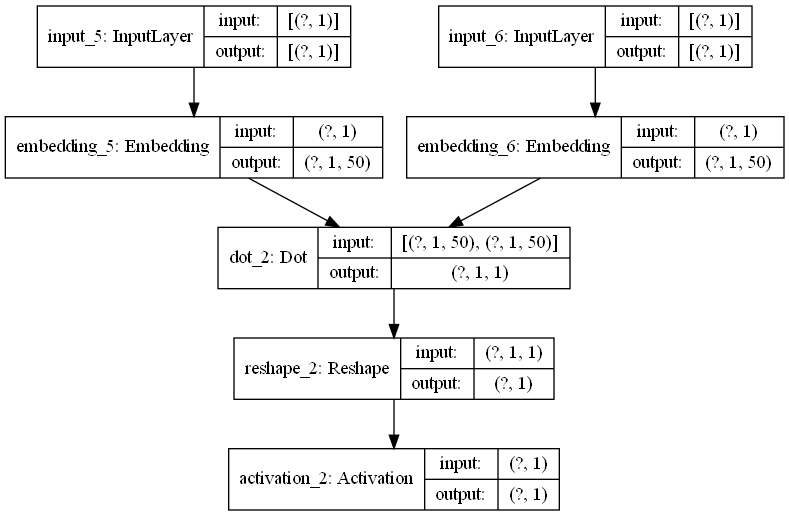

In [46]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [32]:
for epoch in range(1,11):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem] 
        Y = labels 
        loss += model.train_on_batch(X,Y) # 한번의 epoch에 여러 번 트레이닝
        
    print('Epoch : ', epoch, 'Loss : ', loss)

Epoch :  1 Loss :  6.931288957595825
Epoch :  2 Loss :  6.91877681016922
Epoch :  3 Loss :  6.905896723270416
Epoch :  4 Loss :  6.890658378601074
Epoch :  5 Loss :  6.871850848197937
Epoch :  6 Loss :  6.848409414291382
Epoch :  7 Loss :  6.819386303424835
Epoch :  8 Loss :  6.783944666385651
Epoch :  9 Loss :  6.741360604763031
Epoch :  10 Loss :  6.691034972667694


In [33]:
import gensim

f = open('skipgram.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i,:])))))
f.close()

skipgram = gensim.models.KeyedVectors.load_word2vec_format('skipgram.txt', binary=False)

In [34]:
skipgram.most_similar(positive=['soldiers'])

[('qoswfwxjmxqiptylqy', 0.5134414434432983),
 ('logistic', 0.5072365999221802),
 ('slippery', 0.5050913691520691),
 ('chained', 0.4984019994735718),
 ('yesterday', 0.477098673582077),
 ('albertan', 0.47412943840026855),
 ('mlgnidqprlqiwmtqttww', 0.4707348346710205),
 ('egan', 0.46589699387550354),
 ('developement', 0.4620227515697479),
 ('cozy', 0.4618054926395416)]

In [35]:
skipgram.most_similar(positive=['woman'])

[('casual', 0.5136604905128479),
 ('risebrough', 0.4974422752857208),
 ('xmtext', 0.49226686358451843),
 ('proselytize', 0.491951048374176),
 ('ellusive', 0.4908859133720398),
 ('mtddjjqmyyzcxqmkurtov', 0.4770674705505371),
 ('survivor', 0.4665156900882721),
 ('spur', 0.46324798464775085),
 ('pope', 0.4573063552379608),
 ('officially', 0.45277419686317444)]

#### 3. CBOW

In [36]:
def skipgram2cbow(skipgrams):
    cbows = []
    flag = 0
    for n in skip_grams:
        temp1 = []
        for t in n :
            if flag == 0:
                temp1.append(t)
            else:
                flag = 1
                temp2 = []
                for x in t:
                    temp2.append([x[1], x[0]])
                temp1.append(temp2)
        cbows.append(temp1)
    return cbows

cbows = skipgram2cbow(skip_grams)
pairs, labels = cbows[0][0], cbows[0][1]
for i in range(5):
    print('{:s}({:d}), {:s}({:d}) -> {:d}'.format(
    idx2word[pairs[i][0]], pairs[i][0],
    idx2word[pairs[i][1]], pairs[i][1],
    labels[i]))
    
print(len(cbows), len(pairs), len(labels)) 

division(959), hebrews(3170) -> 0
employee(4749), studios(12035) -> 1
injures(12031), someone(90) -> 1
buildling(12032), guns(1029) -> 1
outside(592), instilled(8520) -> 0
10 1020 1020


In [37]:
model = word2vec()

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 50)        1388900     input_3[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1, 50)        1388900     input_4[0][0]                    
____________________________________________________________________________________________

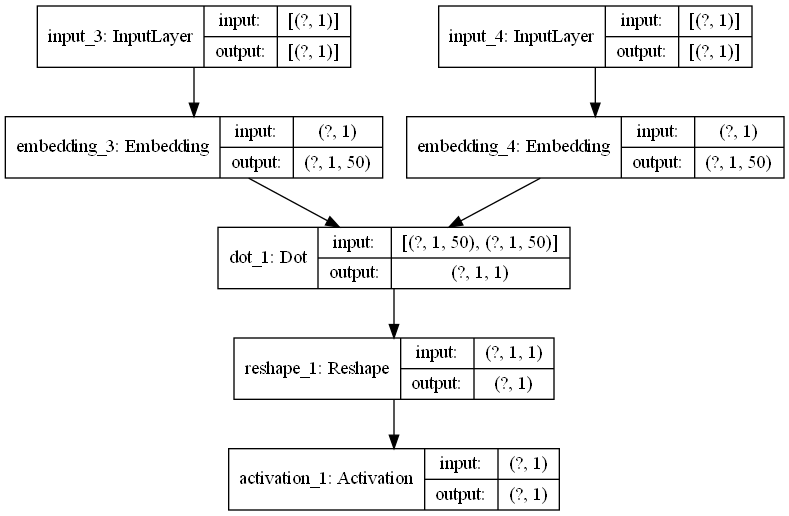

In [38]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [39]:
for epoch in range(1,11):
    loss = 0
    for _, elem in enumerate(cbows):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem] 
        Y = labels 
        loss += model.train_on_batch(X,Y) # 한번의 epoch에 여러 번 트레이닝
        
    print('Epoch : ', epoch, 'Loss : ', loss)

Epoch :  1 Loss :  6.9310813546180725
Epoch :  2 Loss :  6.918268799781799
Epoch :  3 Loss :  6.9050363302230835
Epoch :  4 Loss :  6.889362096786499
Epoch :  5 Loss :  6.8700050711631775
Epoch :  6 Loss :  6.845883309841156
Epoch :  7 Loss :  6.816040873527527
Epoch :  8 Loss :  6.7796391248703
Epoch :  9 Loss :  6.735961019992828
Epoch :  10 Loss :  6.684417486190796


In [40]:
f = open('cbow.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i,:])))))
f.close()

cbow = gensim.models.KeyedVectors.load_word2vec_format('cbow.txt', binary=False)

In [41]:
cbow.most_similar(positive=['soldiers'])

[('vietnams', 0.4991462528705597),
 ('kamleshsalzocaryncusa', 0.4875369668006897),
 ('compromises', 0.46653079986572266),
 ('crabbe', 0.46384280920028687),
 ('hardwired', 0.46024423837661743),
 ('mtxutnisjhzd', 0.458193302154541),
 ('drinking', 0.45633581280708313),
 ('clocks', 0.45309996604919434),
 ('exact', 0.4524226784706116),
 ('joints', 0.44544950127601624)]

In [42]:
cbow.most_similar(['woman'])

[('scanlastline', 0.5278757810592651),
 ('mles', 0.5226907134056091),
 ('breaking', 0.49361947178840637),
 ('affordably', 0.49177804589271545),
 ('continuesi', 0.47872695326805115),
 ('prosecuted', 0.47694194316864014),
 ('flash', 0.47094255685806274),
 ('galileos', 0.4671575725078583),
 ('swallow', 0.45872265100479126),
 ('sbrogiitymnetcom', 0.45476582646369934)]